### read required .npy files

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, AveragePooling2D, BatchNormalization, Permute, ReLU, Softmax
from keras.optimizers.legacy import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
# Load the .npy array
eyes_closed_motor_imagery = np.load(r'C:\Users\akash\PycharmProjects\Brainflow-bci\dataset_user_akash_1_1_24\eyes_closed_motor_imagery\eyes_closed_motor_imagery.npy')
eyes_opened_motor_imagery = np.load(r'C:\Users\akash\PycharmProjects\Brainflow-bci\dataset_user_akash_1_1_24\eyes_opened_motor_imagery\eyes_opened_motor_imagery.npy')
eyes_opened = np.load(r'C:\Users\akash\PycharmProjects\Brainflow-bci\dataset_user_akash_1_1_24\eyes_opened\eyes_opened.npy')
eyes_closed = np.load(r'C:\Users\akash\PycharmProjects\Brainflow-bci\dataset_user_akash_1_1_24\eyes_closed\eyes_closed.npy')


In [4]:
# shape of the arrays
print(f"Shape of the eyes_closed_motor_imagery: {eyes_closed_motor_imagery.shape}")
print(f"Shape of the eyes_opened_motor_imagery: {eyes_opened_motor_imagery.shape}")
print(f"Shape of the eyes_opened: {eyes_opened.shape}")
print(f"Shape of the eyes_closed: {eyes_closed.shape}")

Shape of the eyes_closed_motor_imagery: (84, 401, 4)
Shape of the eyes_opened_motor_imagery: (112, 401, 4)
Shape of the eyes_opened: (70, 401, 4)
Shape of the eyes_closed: (70, 401, 4)


In [9]:
X = np.concatenate((eyes_closed_motor_imagery, eyes_opened_motor_imagery), axis=0)
X = np.concatenate((X, eyes_opened), axis=0)
X = np.concatenate((X, eyes_closed), axis=0)
X.shape

(336, 401, 4)

### create Ys

In [35]:
# eyes_closed_motor_imagery_Y = lable code 1
# eyes_opened_motor_imagery_Y = lable code 2
# eyes_opened_Y = lable code 3
# eyes_closed_Y = lable code 4

eyes_closed_motor_imagery_Y = np.full((84,), 0)
eyes_opened_motor_imagery_Y = np.full((112,), 0)
eyes_opened_Y = np.full((70,), 1)
eyes_closed_Y = np.full((70,), 1)

In [37]:
Y = np.concatenate((eyes_closed_motor_imagery_Y, eyes_opened_motor_imagery_Y), axis=0)
Y = np.concatenate((Y, eyes_opened_Y), axis=0)
Y = np.concatenate((Y, eyes_closed_Y), axis=0)
Y.shape
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## model creation

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, stratify = Y)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((268, 401, 4), (68, 401, 4), (268,), (68,))

In [40]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


#### Build the model

In [41]:
input_shape = X[0, :, :].shape
input_shape

(401, 4)

In [42]:
# new model architecture
# Define the model
model = Sequential()

# Flatten the input data (assuming each sample is a 2D array of shape (800, 4))
model.add(Flatten(input_shape=input_shape))

# Add a dense layer with 64 units and relu activation
model.add(Dense(20, activation='relu',
            activity_regularizer=keras.regularizers.l1(0.00001)))

# Add output layer with 1 unit (assuming binary classification) and sigmoid activation
model.add(Dense(10, activation='relu',
            activity_regularizer=keras.regularizers.l1(0.00001)))

# Added praveen layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1604)              0         
                                                                 
 dense_6 (Dense)             (None, 20)                32100     
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 32321 (126.25 KB)
Trainable params: 32321 (126.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Assuming x_train is your input data and y_train is your target labels
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
7/7 [==============================] - 1s 44ms/step - loss: 1.9682 - accuracy: 0.5374 - val_loss: 0.4557 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2515 - accuracy: 0.8972 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0493 - accuracy: 0.9860 - val_loss: 0.0494 - val_accuracy: 0.9815
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=================

In [45]:
# Save the model
model.save("my_model.h5")

#### Model Evaluation

In [46]:
model = keras.models.load_model("my_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000
Test accuracy 1.0
Test loss 0.0038823471404612064


#### Make prediction

In [47]:
y_train_pred = model.predict(x_train)
y_train_pred.shape

9/9 [==============================] - 0s 2ms/step


(268, 1)

In [48]:
ypred = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)

3/3 [==============================] - 0s 3ms/step
(68, 401, 4)
(68,)


In [50]:
ypred

array([[2.36816049e-04],
       [9.94185686e-01],
       [9.99947846e-01],
       [1.60249983e-05],
       [9.86280975e-06],
       [1.90002338e-05],
       [9.62287304e-04],
       [2.18076389e-02],
       [3.22191307e-04],
       [9.99989629e-01],
       [9.90574837e-01],
       [9.99981523e-01],
       [9.99935746e-01],
       [7.22227013e-03],
       [4.70078558e-05],
       [1.42126030e-03],
       [1.34421725e-05],
       [4.11390181e-04],
       [2.18691980e-06],
       [9.99777317e-01],
       [2.59417784e-03],
       [1.22530549e-03],
       [9.96935964e-01],
       [7.20106950e-03],
       [9.99957442e-01],
       [1.81291427e-03],
       [9.90185201e-01],
       [9.88070488e-01],
       [9.99988675e-01],
       [9.95575428e-01],
       [9.95843709e-01],
       [3.69854479e-06],
       [9.99997795e-01],
       [3.15931207e-03],
       [9.99990046e-01],
       [9.89896715e-01],
       [4.90879283e-05],
       [2.52578019e-07],
       [9.93965328e-01],
       [7.00198143e-06],


#### Post processing

In [52]:
y_train_pred = (y_train_pred > 0.5).astype(int)

In [53]:
y_train_pred.shape

(268, 1)

In [54]:
y_train_pred = y_train_pred[:, 0]  # Select the first column

In [55]:
y_train_pred.shape

(268,)

In [56]:
ypred = (ypred > 0.5).astype(int)

In [57]:
ypred.shape

(68, 1)

In [58]:
ypred = ypred[:, 0]  # Select the first column

In [59]:
ypred.shape

(68,)

#### Confusion Matrix

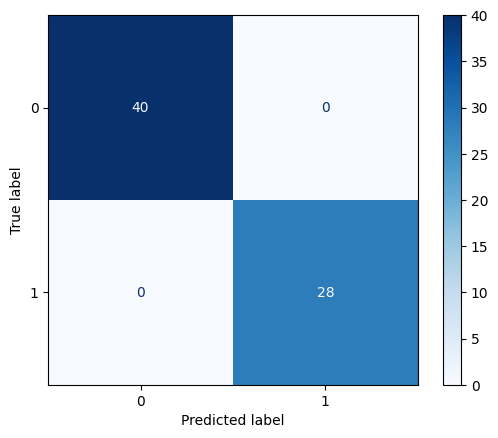

In [60]:
# for X_test
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["0","1"]

cm = confusion_matrix(y_test, ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

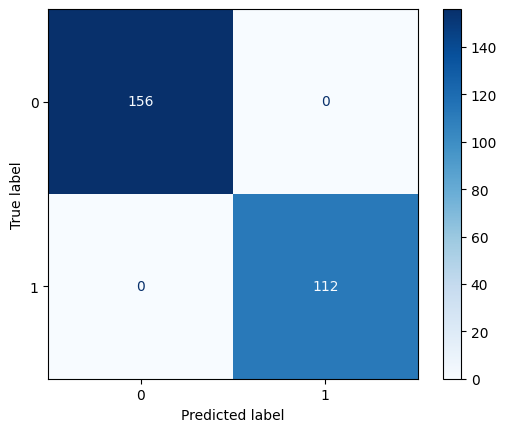

In [61]:
# for X_train
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["0","1"]

cm = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()